In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

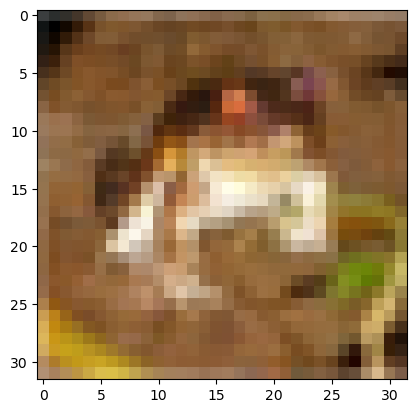

In [3]:
plt.imshow(X_train[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
import numpy as np
import pandas as pd

CAT_VALUE = 3
DOG_VALUE = 5

condition_train = (y_train[:,0]==CAT_VALUE) | (y_train[:,0]==DOG_VALUE)
condition_test = (y_test[:,0]==CAT_VALUE) | (y_test[:,0]==DOG_VALUE)

x_train = X_train[condition_train]
y_train = y_train[condition_train]
x_test = X_test[condition_test]
y_test = y_test[condition_test]

print('x_train shape is ', x_train.shape)
print('y_train shape is ', y_train.shape)
print('\nx_test shape is ', x_test.shape)
print('y_test shape is ', y_test.shape)

x_train shape is  (10000, 32, 32, 3)
y_train shape is  (10000, 1)

x_test shape is  (2000, 32, 32, 3)
y_test shape is  (2000, 1)


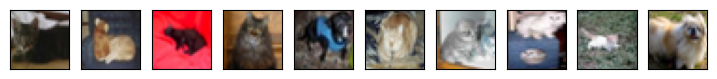

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,90))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np.where(y_train==3, 0, 1)
y_test = np.where(y_test==3, 0, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [10]:
print("X train :", x_train.shape)
print("y train :", y_train.shape)
print("X test :", x_test.shape)
print("y test :", y_test.shape)
print("X val :", x_val.shape)
print("y val :", y_val.shape)

X train : (6400, 32, 32, 3)
y train : (6400, 2)
X test : (2000, 32, 32, 3)
y test : (2000, 2)
X val : (1600, 32, 32, 3)
y val : (1600, 2)


In [11]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu',
                             padding='same', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',
                             padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 100)               4

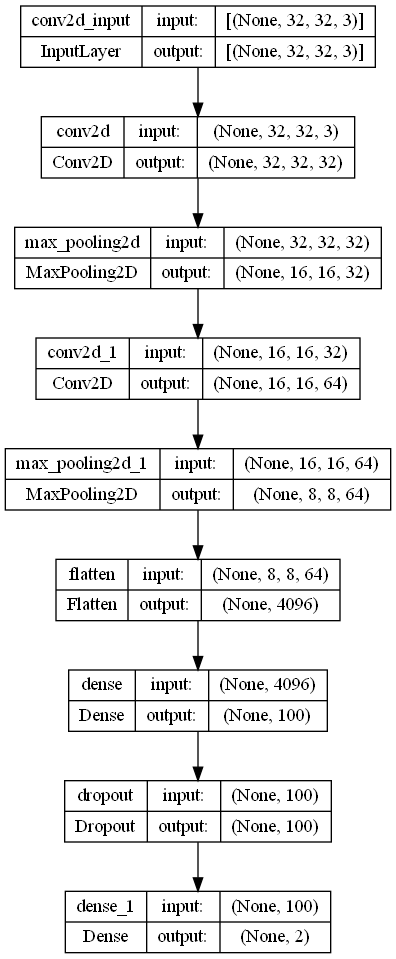

In [13]:
keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', 
              metrics='accuracy')

In [16]:
history = model.fit(x_train, y_train, epochs= 50,batch_size=32, validation_data = (x_val,y_val))

Epoch 1/50
200/200 [==============================] - 6s 29ms/step - loss: 0.4986 - accuracy: 0.7503 - val_loss: 0.5111 - val_accuracy: 0.7431
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 0.4724 - accuracy: 0.7753 - val_loss: 0.5196 - val_accuracy: 0.7375
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 0.4437 - accuracy: 0.7881 - val_loss: 0.5162 - val_accuracy: 0.7400
Epoch 4/50
200/200 [==============================] - 6s 31ms/step - loss: 0.4103 - accuracy: 0.8028 - val_loss: 0.5087 - val_accuracy: 0.7475
Epoch 5/50
200/200 [==============================] - 6s 32ms/step - loss: 0.3793 - accuracy: 0.8244 - val_loss: 0.5328 - val_accuracy: 0.7450
Epoch 6/50
200/200 [==============================] - 6s 32ms/step - loss: 0.3438 - accuracy: 0.8484 - val_loss: 0.5154 - val_accuracy: 0.7513
Epoch 7/50
200/200 [==============================] - 7s 33ms/step - loss: 0.3032 - accuracy: 0.8723 - val_loss: 0.5331 - val_accuracy: 0.7606

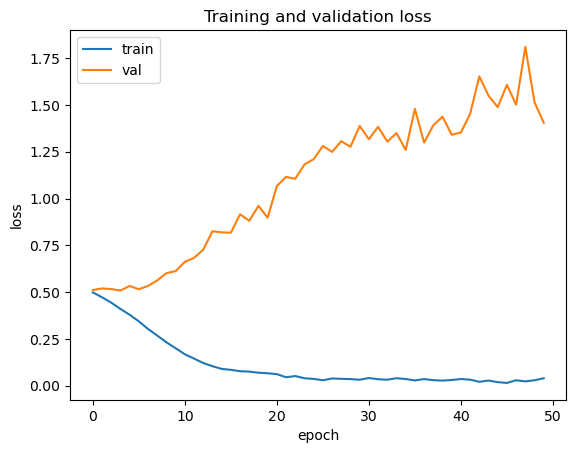

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend(['train','val'])
plt.show()

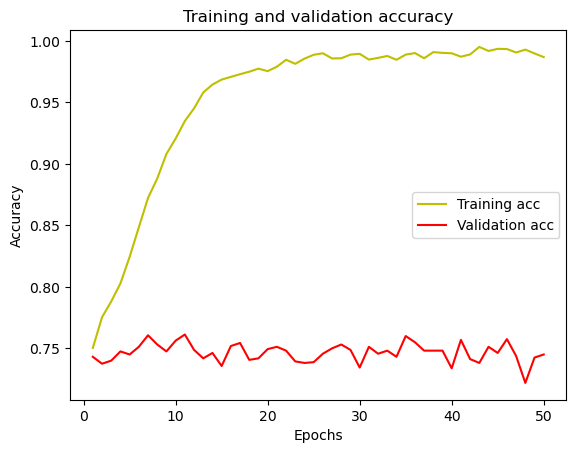

In [22]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()